In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data/ch2_scores_em.csv',
             index_col='student number')

In [10]:
en_scores = df['english'].values[:10]
ma_scores = df['mathematics'].values[:10]

In [11]:
scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                           index=pd.Index(['A','B','C','D','E','F','G','H','I','J'],
                                           name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [12]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] = summary_df['english_deviation']*summary_df['mathematics_deviation']

In [13]:
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [14]:
summary_df['product of deviations'].mean()

62.8

In [16]:
cov_mat = np.cov(en_scores,ma_scores,ddof=0)

In [18]:
cov_mat[0,1]

62.800000000000004

In [19]:
#영어의 분산
cov_mat[0,0]

86.0

In [20]:
np.var(en_scores)

86.0

In [21]:
#수학의 분산
cov_mat[1,1]

68.44000000000001

In [22]:
np.var(ma_scores)

68.44000000000001

In [24]:
np.cov(en_scores,ma_scores,ddof=0)[0,1] / (np.std(en_scores)*np.std(ma_scores))

0.8185692341186713

In [25]:
np.corrcoef(en_scores,ma_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [26]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


In [27]:
import matplotlib.pyplot as plt

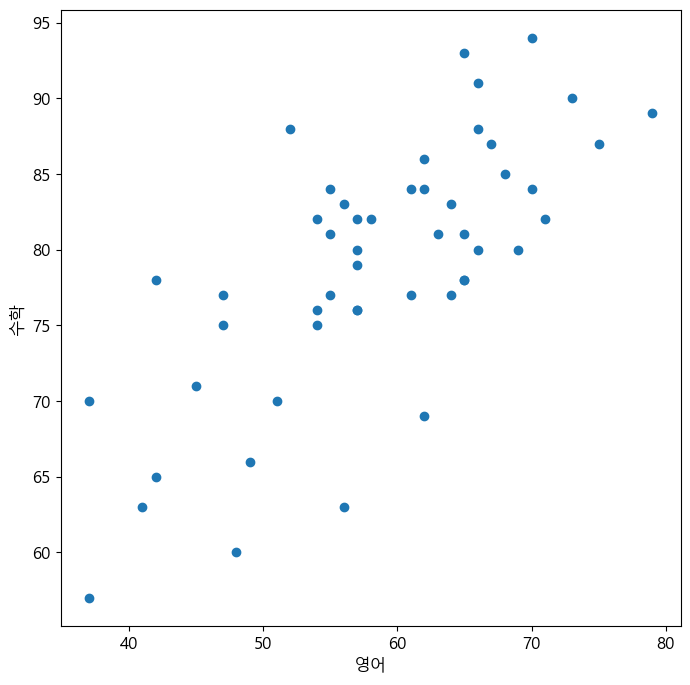

In [28]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(df['english'],df['mathematics'])
ax.set_xlabel('영어')
ax.set_ylabel('수학')
plt.show()

In [46]:
poly_fit = np.polyfit(df['english'],df['mathematics'],1)
poly_fit

array([ 0.62142302, 42.60132433])

In [47]:
poly_1d = np.poly1d(poly_fit)

In [48]:
ploy_1d

poly1d([ 0.73023256, 31.2372093 ])

In [56]:
xs = np.linspace(en_scores.min(),ma_scores.max())

In [57]:
xs

array([41.        , 41.83673469, 42.67346939, 43.51020408, 44.34693878,
       45.18367347, 46.02040816, 46.85714286, 47.69387755, 48.53061224,
       49.36734694, 50.20408163, 51.04081633, 51.87755102, 52.71428571,
       53.55102041, 54.3877551 , 55.2244898 , 56.06122449, 56.89795918,
       57.73469388, 58.57142857, 59.40816327, 60.24489796, 61.08163265,
       61.91836735, 62.75510204, 63.59183673, 64.42857143, 65.26530612,
       66.10204082, 66.93877551, 67.7755102 , 68.6122449 , 69.44897959,
       70.28571429, 71.12244898, 71.95918367, 72.79591837, 73.63265306,
       74.46938776, 75.30612245, 76.14285714, 76.97959184, 77.81632653,
       78.65306122, 79.48979592, 80.32653061, 81.16326531, 82.        ])

In [58]:
ys = poly_1d(xs)

In [59]:
ys

array([68.07966798, 68.59963418, 69.11960038, 69.63956657, 70.15953277,
       70.67949897, 71.19946516, 71.71943136, 72.23939756, 72.75936376,
       73.27932995, 73.79929615, 74.31926235, 74.83922854, 75.35919474,
       75.87916094, 76.39912714, 76.91909333, 77.43905953, 77.95902573,
       78.47899192, 78.99895812, 79.51892432, 80.03889051, 80.55885671,
       81.07882291, 81.59878911, 82.1187553 , 82.6387215 , 83.1586877 ,
       83.67865389, 84.19862009, 84.71858629, 85.23855248, 85.75851868,
       86.27848488, 86.79845108, 87.31841727, 87.83838347, 88.35834967,
       88.87831586, 89.39828206, 89.91824826, 90.43821445, 90.95818065,
       91.47814685, 91.99811305, 92.51807924, 93.03804544, 93.55801164])

In [60]:
41*0.73023256+31.2372093 #61.17674419

61.17674426

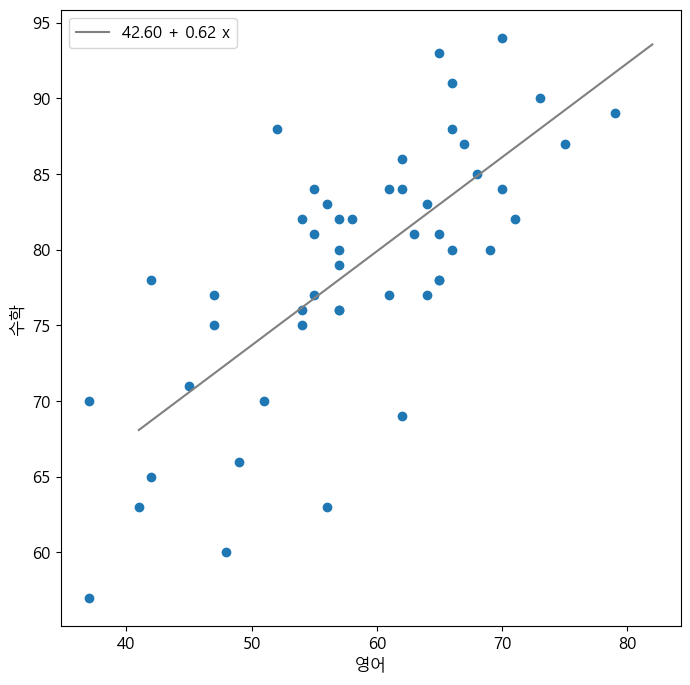

In [61]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(df['english'],df['mathematics'])
ax.plot(xs,ys,color='gray',
        label=f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f} x')
ax.set_xlabel('영어')
ax.set_ylabel('수학')
ax.legend(loc='upper left')
plt.show()

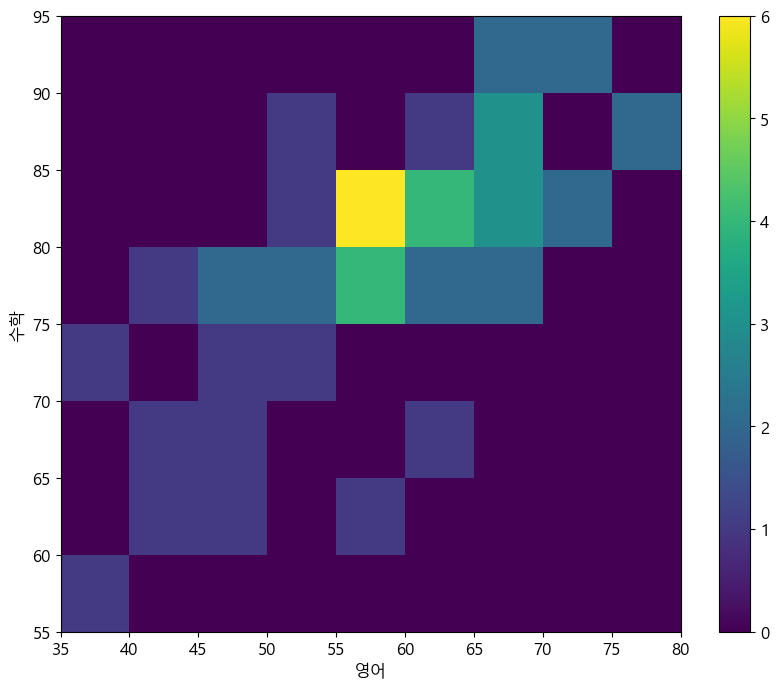

In [62]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.hist2d(df['english'],
              df['mathematics'],
              bins=[9,8],
              range=[(35,80),(55,95)])
ax.set_xlabel('영어')
ax.set_ylabel('수학')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3],ax=ax)
plt.show()